In [1]:
#%pip install -U spacy

In [2]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
from collections import Counter
data = pd.read_excel('train.xlsx',sheet_name='Sheet1')
popular = data[data["target"]==1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   track             10000 non-null  object 
 2   artist            10000 non-null  object 
 3   decade            10000 non-null  int64  
 4   danceability      10000 non-null  float64
 5   energy            10000 non-null  float64
 6   key               10000 non-null  int64  
 7   loudness          10000 non-null  float64
 8   mode              10000 non-null  int64  
 9   speechiness       10000 non-null  float64
 10  acousticness      10000 non-null  float64
 11  instrumentalness  10000 non-null  float64
 12  liveness          10000 non-null  float64
 13  valence           10000 non-null  float64
 14  tempo             10000 non-null  float64
 15  duration_ms       10000 non-null  int64  
 16  time_signature    10000 non-null  int64  

In [4]:
import statsmodels.formula.api as sm
data = data.drop(['id'],axis=1)
data = data.drop(['artist'],axis=1)
data = data.drop(['track'],axis=1)
y = data['target']
X = data.drop(['target'],axis=1)
#X = X.drop(['id'],axis=1).drop(['track'],axis=1)
#X.head()
Xs = ' + '.join(data.columns.drop('target'))  
Xs
my_model = sm.ols(formula=f'target ~ {Xs}', data=data).fit()
print(my_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     195.2
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:48:56   Log-Likelihood:                -5891.4
No. Observations:               10000   AIC:                         1.182e+04
Df Residuals:                    9983   BIC:                         1.194e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.4532      0.619  

In [5]:
cutoff = 0.47
y_pred = (my_model.predict(data)>cutoff).astype(int)
print(confusion_matrix(data['target'], y_pred))
print('accuracy: {:.3f}'.format(accuracy_score(data['target'], y_pred)))

[[2953 2213]
 [ 614 4220]]
accuracy: 0.717


In [6]:
# TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [7]:
my_model_2 = sm.ols(formula=f'target ~ {Xs}', data=data_train).fit()
print(my_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     154.6
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:48:57   Log-Likelihood:                -4722.2
No. Observations:                8000   AIC:                             9478.
Df Residuals:                    7983   BIC:                             9597.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.4119      0.698  

In [8]:
# Confusion matrix, TRAIN set #
cutoff = 0.47
y_pred = (my_model_2.predict(data_train)>cutoff).astype(int)
print(confusion_matrix(data_train['target'], y_pred))
print('accuracy: {:.3f}'.format(accuracy_score(data_train['target'], y_pred)))
print('precission: {:.3f}'.format(precision_score(data_train['target'],y_pred)))
print('recall: {:.3f}'.format(recall_score(data_train['target'],y_pred)))
print('F1: {:.3f}'.format(2*(recall_score(data_train['target'],y_pred)*precision_score(data_train['target'],y_pred))/(precision_score(data_train['target'],y_pred)+recall_score(data_train['target'],y_pred))))

[[2350 1782]
 [ 497 3371]]
accuracy: 0.715
precission: 0.654
recall: 0.872
F1: 0.747


In [9]:
# Confusion matrix, TEST set #
y_pred = (my_model_2.predict(data_test)>cutoff).astype(int)
print(confusion_matrix(data_test['target'], y_pred))
print('accuracy: {:.3f}'.format(accuracy_score(data_test['target'], y_pred)))
print('precission: {:.3f}'.format(precision_score(data_test['target'],y_pred)))
print('recall: {:.3f}'.format(recall_score(data_test['target'],y_pred)))
print('F1: {:.3f}'.format(2*(recall_score(data_test['target'],y_pred)*precision_score(data_test['target'],y_pred))/(precision_score(data_test['target'],y_pred)+recall_score(data_test['target'],y_pred))))

[[618 416]
 [126 840]]
accuracy: 0.729
precission: 0.669
recall: 0.870
F1: 0.756


In [10]:
# *** READ THE DATA ***
test = pd.read_excel('test.xlsx',sheet_name='Sheet1')
test_clean = test
test = test.drop(['id'],axis=1)
test = test.drop(['artist'],axis=1)
test = test.drop(['track'],axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decade            2000 non-null   int64  
 1   danceability      2000 non-null   float64
 2   energy            2000 non-null   float64
 3   key               2000 non-null   int64  
 4   loudness          2000 non-null   float64
 5   mode              2000 non-null   int64  
 6   speechiness       2000 non-null   float64
 7   acousticness      2000 non-null   float64
 8   instrumentalness  2000 non-null   float64
 9   liveness          2000 non-null   float64
 10  valence           2000 non-null   float64
 11  tempo             2000 non-null   float64
 12  duration_ms       2000 non-null   int64  
 13  time_signature    2000 non-null   int64  
 14  chorus_hit        2000 non-null   float64
 15  sections          2000 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 250

In [11]:
cutoff = 0.5
y_pred = my_model_2.predict(test)
y_pred.head()

0    0.398969
1    0.567439
2    0.757818
3    0.575809
4    0.474661
dtype: float64

In [12]:
test_clean['prob_hit'] = pd.Series(y_pred)
test_clean.head()
test_clean.to_excel("solution_last_week_regression.xlsx")
topsong = test_clean.loc[test_clean['prob_hit'].idxmax()]
topsong
np.savetxt("regression.txt",topsong, fmt='%s')

# Simple Decision tree

In [13]:
from collections import Counter
data = pd.read_excel('train.xlsx',sheet_name='Sheet1')
popular = data[data["target"]==1]
#data.info()

In [14]:
# Possible Detect Outlayers
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

data.loc[detect_outliers(data,["target","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"])]
data = data.drop(detect_outliers(data,["target","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"]),axis = 0).reset_index(drop = True)

In [15]:
data = data.drop(['id'],axis=1)
data = data.drop(['artist'],axis=1)
data = data.drop(['track'],axis=1)
#data = data.drop(['artist_array'],axis=1)
#data = data.drop(['top50'],axis=1)
data = data.rename(columns={'mode': 'beat'})
#data.info()
data.duration_ms= data.duration_ms.astype(float)
data.time_signature= data.time_signature.astype(float)
data.mode = data.beat.astype(float)
data["key"] = data["key"].astype("category")
data = pd.get_dummies(data, columns=["key"])
data["beat"] = data["beat"].astype("category")
data = pd.get_dummies(data, columns=["beat"])
data["time_signature"] = data["time_signature"].astype("category")
data = pd.get_dummies(data, columns=["time_signature"])
data["decade"] = data["decade"].astype("category")
data = pd.get_dummies(data, columns=["decade"])
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   danceability        9889 non-null   float64
 1   energy              9889 non-null   float64
 2   loudness            9889 non-null   float64
 3   speechiness         9889 non-null   float64
 4   acousticness        9889 non-null   float64
 5   instrumentalness    9889 non-null   float64
 6   liveness            9889 non-null   float64
 7   valence             9889 non-null   float64
 8   tempo               9889 non-null   float64
 9   duration_ms         9889 non-null   float64
 10  chorus_hit          9889 non-null   float64
 11  sections            9889 non-null   int64  
 12  target              9889 non-null   int64  
 13  key_0               9889 non-null   uint8  
 14  key_1               9889 non-null   uint8  
 15  key_2               9889 non-null   uint8  
 16  key_3 

In [16]:
y = data['target']
X = data.drop(['target'],axis=1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
treeclf = DecisionTreeClassifier(max_depth=7)
treeclf.fit(x_train, y_train)
y_pred=treeclf.predict(x_test)
DecisionTree_score=treeclf.score(x_test,y_test)
print(confusion_matrix(y_test, y_pred))
print('accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('precission: {:.3f}'.format(precision_score(y_test,y_pred)))
print('recall: {:.3f}'.format(recall_score(y_test,y_pred)))
print('F1: {:.3f}'.format(2*(recall_score(y_test,y_pred)*precision_score(y_test,y_pred))/(precision_score(y_test,y_pred)+recall_score(y_test,y_pred))))

[[639 364]
 [168 807]]
accuracy: 0.731
precission: 0.689
recall: 0.828
F1: 0.752


In [19]:
# Train the  tree with all the data:
treeclf = DecisionTreeClassifier(max_depth=7)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=7)

[Text(0.4995888157894737, 0.9375, 'instrumentalness <= 0.016\ngini = 0.5\nsamples = 9889\nvalue = [5059, 4830]'),
 Text(0.25356359649122806, 0.8125, 'danceability <= 0.475\ngini = 0.477\nsamples = 7028\nvalue = [2766, 4262]'),
 Text(0.12664473684210525, 0.6875, 'speechiness <= 0.044\ngini = 0.49\nsamples = 1684\nvalue = [964, 720]'),
 Text(0.06030701754385965, 0.5625, 'beat_1 <= 0.5\ngini = 0.491\nsamples = 870\nvalue = [377, 493]'),
 Text(0.03289473684210526, 0.4375, 'duration_ms <= 151713.0\ngini = 0.47\nsamples = 180\nvalue = [112, 68]'),
 Text(0.017543859649122806, 0.3125, 'tempo <= 128.298\ngini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(0.008771929824561403, 0.1875, 'time_signature_5.0 <= 0.5\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.0043859649122807015, 0.0625, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.013157894736842105, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02631578947368421, 0.1875, 'tempo <= 142.318\ngini = 0.5\nsamples = 

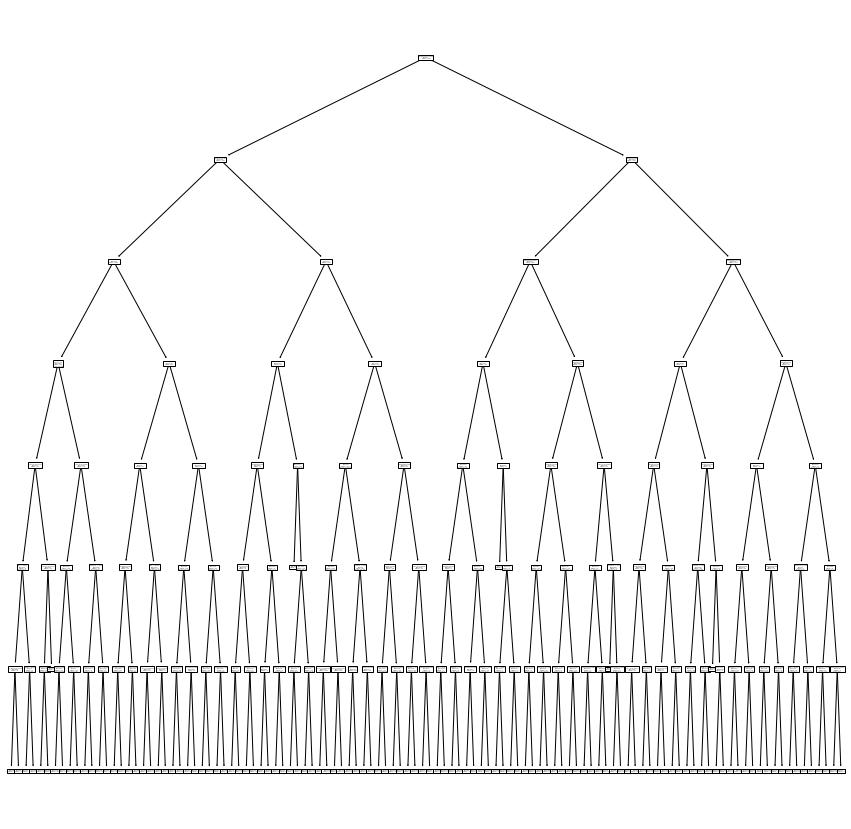

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(treeclf, feature_names = X.columns)

In [21]:
# *** READ THE DATA ***
test = pd.read_excel('test.xlsx',sheet_name='Sheet1')
test_clean = test
test = test.drop(['id'],axis=1)
test = test.drop(['artist'],axis=1)
test = test.drop(['track'],axis=1)
test = test.rename(columns={'mode': 'beat'})
test.duration_ms= test.duration_ms.astype(float)
test.time_signature= test.time_signature.astype(float)
test.mode = test.beat.astype(float)

In [22]:
test["key"] = test["key"].astype("category")
test = pd.get_dummies(test, columns=["key"])
test["beat"] = test["beat"].astype("category")
test = pd.get_dummies(test, columns=["beat"])
test["time_signature"] = test["time_signature"].astype("category")
test = pd.get_dummies(test, columns=["time_signature"])
test["decade"] = test["decade"].astype("category")
test = pd.get_dummies(test, columns=["decade"])

solution=treeclf.predict(test)
aux_prob=treeclf.predict_proba(test)
prob = pd.DataFrame(aux_prob, columns = ['prob_not_hit','prob_hit'])
test_clean['prediction'] = pd.Series(solution)
test_clean['prob_hit'] = prob['prob_hit']
test_clean['prob_not_hit'] = prob['prob_not_hit']
#np.savetxt('solution_w_text_findings_prob.csv', test_clean, delimiter=',')
test_clean.to_excel("solution_last_week_simple_deci_tree.xlsx")
topsong = test_clean.loc[test_clean['prob_hit'].idxmax()]
topsong
np.savetxt("dec_tree_simple.txt",topsong, fmt='%s')

# Testing different solutions. In this case, word cloud to find more infor about the names. top50 artists

In [23]:
from collections import Counter
data = pd.read_excel('train.xlsx',sheet_name='Sheet1')
popular = data[data["target"]==1]
#data.info()

In [24]:
data = data.assign(featuring = np.where((data['artist'].str.contains('Featuring')) | (data['artist'].str.contains('&')) | (data['track'].str.contains('feat')),1,0))
#data = data.assign(featuring = np.where((data['artist'].str.contains('&')),1,0))
#data = data.assign(featuring = np.where((data['track'].str.contains('feat')),1,0))
artists = (popular['artist'].str.split(' Featuring | & ').str[0].str.strip()).str.split('&').str[0].str.strip()
name_count = Counter(artists).most_common(50)
top50 = []
for n in name_count:
    top50.append(str(n[0]))
top50df = pd.DataFrame (top50, columns = ['artist'])
#name_count
top50
#data[data["featuring"]==1]

['Drake',
 'Chris Young',
 'Robert Palmer',
 'War',
 'Future',
 'Roger Miller',
 'Thomas Rhett',
 'Nelly',
 'Brandy',
 'Lil Wayne',
 'Shania Twain',
 'Calvin Harris',
 'The Searchers',
 'Florida Georgia Line',
 'Eddie Kendricks',
 'The Chainsmokers',
 'Burl Ives',
 'Lupe Fiasco',
 'Pitbull',
 'Roberta Flack',
 'Kendrick Lamar',
 'Monica',
 'Jim Reeves',
 'Jennifer Lopez',
 'John Waite',
 'Metallica',
 'The Main Ingredient',
 'Nancy Sinatra',
 'Flo Rida',
 'Enrique Iglesias',
 'Steppenwolf',
 'Warrant',
 'Clarence Carter',
 'Don Henley',
 'Selena Gomez',
 'Melissa Manchester',
 'Charlie Rich',
 'Rick Ross',
 'Nicki Minaj',
 'Judy Collins',
 'The Kingston Trio',
 'Luke Combs',
 'Easton Corbin',
 'Jonas Brothers',
 'Wale',
 'Toto',
 'SHeDAISY',
 '2 Chainz',
 'David Guetta',
 'Tears For Fears']

In [25]:
res = data['artist'].str.split(' Featuring| &')
data['artist_array'] = res.apply('|'.join)
pattern = '|'.join(top50)

for artist in top50:
    data['top50'] = data['artist_array'].str.contains(pattern)
data.to_excel("dataartist_array.xlsx")

In [26]:
# Possible Detect Outlayers
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

data.loc[detect_outliers(data,["target","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"])]
data = data.drop(detect_outliers(data,["target","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"]),axis = 0).reset_index(drop = True)

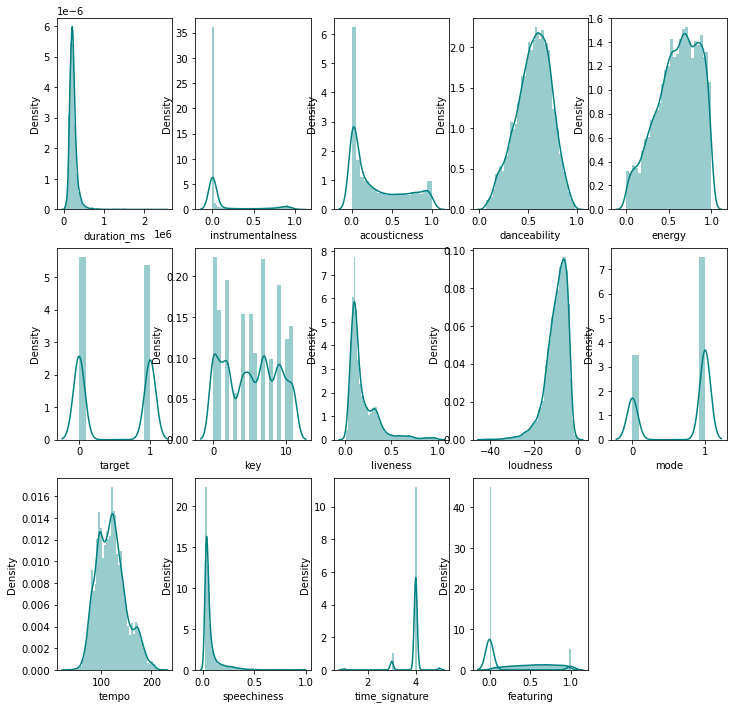

In [27]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( data["duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( data["target"] , color="teal", ax=axes[1, 0])
sns.distplot( data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( data["mode"] , color="teal", ax=axes[1, 4])
sns.distplot( data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( data["valence"] , color="teal", ax=axes[2, 3])
sns.distplot( data["featuring"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

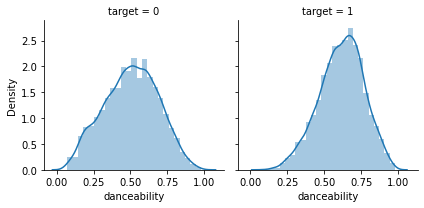

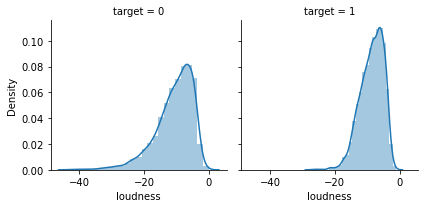

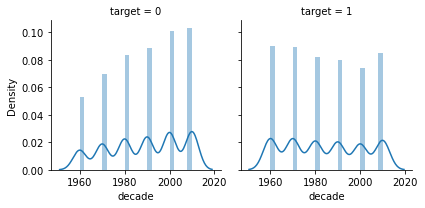

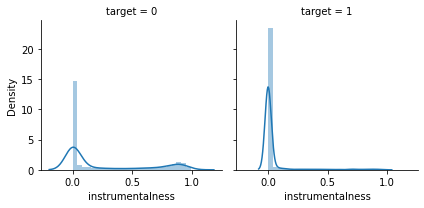

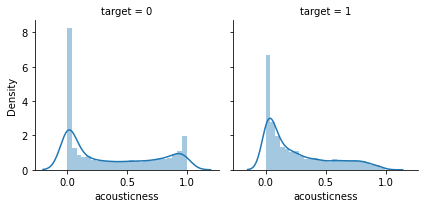

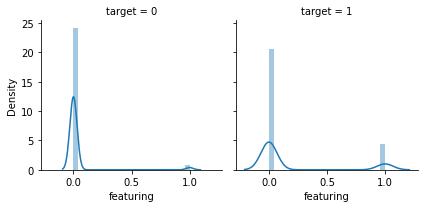

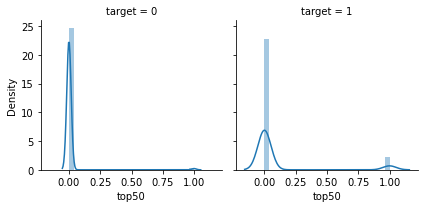

In [28]:

g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()
g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()
g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "decade", bins = 25)
plt.show()
g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()
g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()
g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "featuring", bins = 25)
plt.show()
g = sns.FacetGrid(data, col = "target")
g.map(sns.distplot, "top50", bins = 25)
plt.show()

In [29]:
data = data.drop(['id'],axis=1)
data = data.drop(['artist'],axis=1)
data = data.drop(['track'],axis=1)
data = data.drop(['artist_array'],axis=1)
#data = data.drop(['top50'],axis=1)
data = data.rename(columns={'mode': 'beat'})
#data.info()
data.duration_ms= data.duration_ms.astype(float)
data.time_signature= data.time_signature.astype(float)
data.mode = data.beat.astype(float)
data["key"] = data["key"].astype("category")
data = pd.get_dummies(data, columns=["key"])
data["beat"] = data["beat"].astype("category")
data = pd.get_dummies(data, columns=["beat"])
data["time_signature"] = data["time_signature"].astype("category")
data = pd.get_dummies(data, columns=["time_signature"])
data["decade"] = data["decade"].astype("category")
data = pd.get_dummies(data, columns=["decade"])
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,0.576,0.603,-9.603,0.0329,0.45500,0.053700,0.0406,0.524,103.658,582733.0,...,0,0,1,0,0,1,0,0,0,0
1,0.806,0.666,-5.755,0.1170,0.02600,0.000000,0.7200,0.571,131.939,307933.0,...,0,0,1,0,0,0,0,1,0,0
2,0.737,0.676,-4.706,0.0620,0.03080,0.000217,0.1460,0.746,101.989,272941.0,...,0,0,1,0,0,0,0,0,0,1
3,0.730,0.731,-3.438,0.0279,0.27800,0.000000,0.2580,0.649,131.396,216546.0,...,0,0,1,0,0,0,0,1,0,0
4,0.779,0.946,-6.069,0.0636,0.00485,0.000082,0.1890,0.604,119.945,310067.0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
y = data['target']
X = data.drop(['target'],axis=1)
#X = X.drop(['id'],axis=1).drop(['track'],axis=1)
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,0.576,0.603,-9.603,0.0329,0.45500,0.053700,0.0406,0.524,103.658,582733.0,...,0,0,1,0,0,1,0,0,0,0
1,0.806,0.666,-5.755,0.1170,0.02600,0.000000,0.7200,0.571,131.939,307933.0,...,0,0,1,0,0,0,0,1,0,0
2,0.737,0.676,-4.706,0.0620,0.03080,0.000217,0.1460,0.746,101.989,272941.0,...,0,0,1,0,0,0,0,0,0,1
3,0.730,0.731,-3.438,0.0279,0.27800,0.000000,0.2580,0.649,131.396,216546.0,...,0,0,1,0,0,0,0,1,0,0
4,0.779,0.946,-6.069,0.0636,0.00485,0.000082,0.1890,0.604,119.945,310067.0,...,0,0,1,0,0,0,0,0,1,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#x_test.info()

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7911 entries, 3328 to 7270
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   danceability        7911 non-null   float64
 1   energy              7911 non-null   float64
 2   loudness            7911 non-null   float64
 3   speechiness         7911 non-null   float64
 4   acousticness        7911 non-null   float64
 5   instrumentalness    7911 non-null   float64
 6   liveness            7911 non-null   float64
 7   valence             7911 non-null   float64
 8   tempo               7911 non-null   float64
 9   duration_ms         7911 non-null   float64
 10  chorus_hit          7911 non-null   float64
 11  sections            7911 non-null   int64  
 12  featuring           7911 non-null   int32  
 13  top50               7911 non-null   bool   
 14  key_0               7911 non-null   uint8  
 15  key_1               7911 non-null   uint8  
 16  key

In [33]:
treeclf = DecisionTreeClassifier(max_depth=8)
treeclf.fit(x_train, y_train)
y_pred=treeclf.predict(x_test)
DecisionTree_score=treeclf.score(x_test,y_test)
print("Train accuracy of decision tree:",treeclf.score(x_train,y_train))
print("Test accuracy of decision tree:",treeclf.score(x_test,y_test))
#round(treeclf.score(X, y), 4) # accuracy of classification tree

Train accuracy of decision tree: 0.7944634053849071
Test accuracy of decision tree: 0.7320525783619818


In [34]:
print(confusion_matrix(y_test, y_pred))
print('accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('precission: {:.3f}'.format(precision_score(y_test,y_pred)))
print('recall: {:.3f}'.format(recall_score(y_test,y_pred)))
print('F1: {:.3f}'.format(2*(recall_score(y_test,y_pred)*precision_score(y_test,y_pred))/(precision_score(y_test,y_pred)+recall_score(y_test,y_pred))))

[[649 354]
 [176 799]]
accuracy: 0.732
precission: 0.693
recall: 0.819
F1: 0.751


In [35]:
# Train the  tree with all the data:
treeclf = DecisionTreeClassifier(max_depth=6)
treeclf.fit(X, y)
round(treeclf.score(X, y), 3)

0.749

In [36]:
from sklearn.tree import plot_tree

#plt.figure(figsize=(15,15))
#plot_tree(treeclf, feature_names = X.columns)

In [37]:
# *** READ THE DATA ***
test = pd.read_excel('test.xlsx',sheet_name='Sheet1')
test_clean = test
test = test.assign(featuring = np.where((test['artist'].str.contains('Featuring')) | (test['artist'].str.contains('&')) | (test['track'].str.contains('feat')),1,0))

test['artist_array'] = test['artist'].str.split(' Featuring| &')
test['artist_array'].str.strip()

res = test['artist'].str.split(' Featuring| &')
test['artist_array'] = res.apply('|'.join)
pattern = '|'.join(top50)

for artist in top50:
    test['top50'] = test['artist_array'].str.contains(pattern)


test = test.drop(['id'],axis=1)
test = test.drop(['artist'],axis=1)
test = test.drop(['track'],axis=1)
test = test.drop(['artist_array'],axis=1)
#test = test.drop(['top50'],axis=1)
test = test.rename(columns={'mode': 'beat'})
test.duration_ms= test.duration_ms.astype(float)
test.time_signature= test.time_signature.astype(float)
test.mode = test.beat.astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decade            2000 non-null   int64  
 1   danceability      2000 non-null   float64
 2   energy            2000 non-null   float64
 3   key               2000 non-null   int64  
 4   loudness          2000 non-null   float64
 5   beat              2000 non-null   int64  
 6   speechiness       2000 non-null   float64
 7   acousticness      2000 non-null   float64
 8   instrumentalness  2000 non-null   float64
 9   liveness          2000 non-null   float64
 10  valence           2000 non-null   float64
 11  tempo             2000 non-null   float64
 12  duration_ms       2000 non-null   float64
 13  time_signature    2000 non-null   float64
 14  chorus_hit        2000 non-null   float64
 15  sections          2000 non-null   int64  
 16  featuring         2000 non-null   int32  


In [38]:
test["key"] = test["key"].astype("category")
test = pd.get_dummies(test, columns=["key"])
test["beat"] = test["beat"].astype("category")
test = pd.get_dummies(test, columns=["beat"])
test["time_signature"] = test["time_signature"].astype("category")
test = pd.get_dummies(test, columns=["time_signature"])
test["decade"] = test["decade"].astype("category")
test = pd.get_dummies(test, columns=["decade"])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   danceability        2000 non-null   float64
 1   energy              2000 non-null   float64
 2   loudness            2000 non-null   float64
 3   speechiness         2000 non-null   float64
 4   acousticness        2000 non-null   float64
 5   instrumentalness    2000 non-null   float64
 6   liveness            2000 non-null   float64
 7   valence             2000 non-null   float64
 8   tempo               2000 non-null   float64
 9   duration_ms         2000 non-null   float64
 10  chorus_hit          2000 non-null   float64
 11  sections            2000 non-null   int64  
 12  featuring           2000 non-null   int32  
 13  top50               2000 non-null   bool   
 14  key_0               2000 non-null   uint8  
 15  key_1               2000 non-null   uint8  
 16  key_2 

In [39]:
test.loc[1317]

danceability             0.501
energy                   0.823
loudness                -5.752
speechiness             0.0386
acousticness             0.441
instrumentalness           0.0
liveness                 0.427
valence                  0.811
tempo                  154.999
duration_ms           265560.0
chorus_hit             24.2852
sections                    13
featuring                    0
top50                    False
key_0                        1
key_1                        0
key_2                        0
key_3                        0
key_4                        0
key_5                        0
key_6                        0
key_7                        0
key_8                        0
key_9                        0
key_10                       0
key_11                       0
beat_0                       0
beat_1                       1
time_signature_1.0           0
time_signature_3.0           0
time_signature_4.0           1
time_signature_5.0           0
decade_1

In [40]:
solution=treeclf.predict(test)
aux_prob=treeclf.predict_proba(test)
prob = pd.DataFrame(aux_prob, columns = ['prob_not_hit','prob_hit'])
aux_prob
#np.savetxt('solution_w_text_probabilities.csv', prob, delimiter=',', fmt='%f')

array([[0.90643275, 0.09356725],
       [0.55891239, 0.44108761],
       [0.39330544, 0.60669456],
       ...,
       [0.14705882, 0.85294118],
       [0.93193717, 0.06806283],
       [0.30215293, 0.69784707]])

In [41]:
test_clean['prediction'] = pd.Series(solution)
test_clean['prob_hit'] = prob['prob_hit']
test_clean['prob_not_hit'] = prob['prob_not_hit']

#np.savetxt('solution_w_text_findings_prob.csv', test_clean, delimiter=',')
test_clean.to_excel("solution_last_week_cmpl_decisiontree.xlsx")
topsong = test_clean.loc[test_clean['prob_hit'].idxmax()]
topsong
np.savetxt("dec_tree_text_minning.txt",topsong, fmt='%s')